<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Churn_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [6]:
# Importing some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Splitting the dataset into independent and dependent features
X = dataset.drop(columns=['RowNumber','CustomerId','Surname','Exited']) # X=dataset.iloc[:,3:13]
Y = dataset['Exited'] # Y=dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)
print(geography)
print(gender)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]
       Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


In [13]:
# Concatenate these varialbes with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X=pd.concat([X,geography,gender],axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [17]:
# Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
# Features Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
Y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
1037,0
2899,0
9549,0
2740,0


In [21]:
X_train.shape

(8000, 11)

In [22]:
# Creating the ANN (Artificial Neural Network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [23]:
# Lets initialize the ANN
classifier=Sequential()

In [24]:
# Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))

In [25]:
# Adding the first Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [26]:
# Adding the second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [27]:
# Adding the Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [28]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
# By default adam optimizer uses learning rate 0.001
# So if you want to set the learning rate by yourself then you can use this
# import tensorflow
# opt = tensorflow.keras.optimizers.Adam(leanring_rate=0.03)

In [33]:
# Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8724 - loss: 0.3115 - val_accuracy: 0.8448 - val_loss: 0.3794
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3088 - val_accuracy: 0.8455 - val_loss: 0.3806
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3054 - val_accuracy: 0.8448 - val_loss: 0.3822
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3156 - val_accuracy: 0.8425 - val_loss: 0.3849
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3074 - val_accuracy: 0.8440 - val_loss: 0.3857
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8797 - loss: 0.2985 - val_accuracy: 0.8406 - val_loss: 0.3810
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.3025 - val_accuracy: 0.8436 - val_loss: 0.3765
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3021 

In [50]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

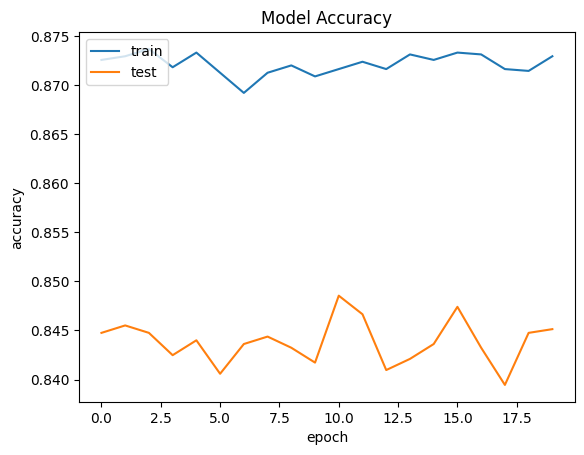

In [51]:
# Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

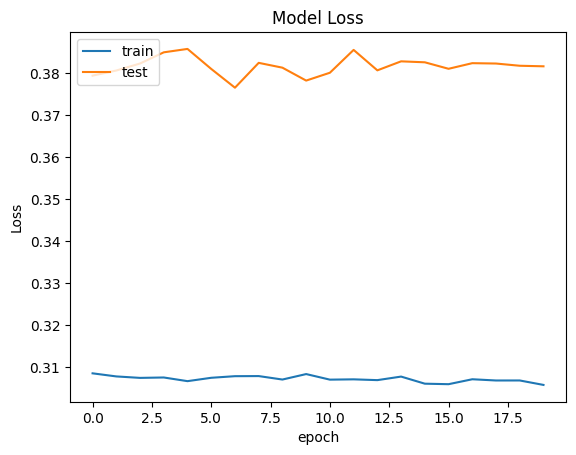

In [52]:
# Summarize the history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [53]:
# Making the predictions and evaluating the model

# Preicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1501,   94],
       [ 193,  212]])

In [55]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)

In [56]:
score

0.8565

In [57]:
# get the weights
classifier.get_weights()

[array([[ 1.00269355e-01,  5.16733453e-02, -2.34666303e-01,
          2.07305863e-01, -1.11925356e-01,  5.24315894e-01,
         -8.79784599e-02, -1.75746143e-01,  2.77015716e-01,
         -4.52372223e-01, -1.71467364e-01],
        [ 6.71944797e-01, -2.35331550e-01, -4.97653455e-01,
         -8.52068663e-02, -1.62296891e-01,  1.68132216e-01,
          8.45944285e-01, -3.37848723e-01, -1.35948151e-01,
          4.02116656e-01,  9.72549736e-01],
        [-2.21093550e-01, -1.50924340e-01, -2.67111033e-01,
          1.61084309e-01,  8.40601623e-01,  7.53026009e-01,
          7.08450272e-04,  2.31506631e-01,  3.84928972e-01,
         -1.05891146e-01, -1.46762460e-01],
        [ 4.55390334e-01, -2.23213255e-01,  4.81012583e-01,
          4.00955170e-01, -9.64264929e-01,  3.61592650e-01,
          2.45383546e-01, -4.17307317e-01, -2.33649760e-01,
         -7.75988102e-01, -4.75678176e-01],
        [-7.11277604e-01,  7.20896363e-01, -6.74407303e-01,
          1.03060138e+00, -4.97994006e-01, -